Poniższy skrypt służy do analizy danych z pliku star_classification.csv. Badane są braki danych, rozkłady zmiennych, wykresy pudełkowe.
# Importowanie bibliotek

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych
Dane zostały wczytane z plików csv stworzonych w skrypcie "Prepare_sets".

In [19]:
data = pd.read_csv("star_classification.csv")
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

# Analiza danych

### Podstawowe informacje o danych

Pierwsze pięć wierszy danych

In [20]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


Informacje na temat dannych w kategoriach: nazwa kolumny, ilość wartości niepustych, typ danych

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

### Analiza braków danych
Brak braujących danych

In [22]:
data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

### Analiza rozkładów zmiennych
Kolejno: średnia, odchylenie standardowe, minimum, 25 percentyl, 50 percentyl, 75 percentyl, maksimum
Analizowane zbiory danych: cały zbiór, zbiór treningowy, zbiór testowy

In [23]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [24]:
X_train.describe()

,1.237661384386740736e+18,1.550574784422699963e+02,3.947193423142389435e+01,2.232247000000000270e+01,2.140112999999999843e+01,2.051302000000000092e+01,1.962691000000000230e+01,1.934790999999999883e+01,3.704000000000000000e+03,3.010000000000000000e+02,6.000000000000000000e+00,1.510000000000000000e+02,5.136367837972289536e+18,6.598688999999999805e-01,4.562000000000000000e+03,5.557000000000000000e+04,4.500000000000000000e+01
count,7.999900e+04,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.0,79999.000000,79999.000000,7.999900e+04,79999.000000,79999.000000,79999.000000,79999.000000
mean,1.237665e+18,177.579501,24.132399,21.959110,20.507665,19.647415,19.085044,18.644631,4477.886386,301.0,3.511356,185.663483,5.783102e+18,0.577218,5136.317141,55587.191615,448.892486
std,8.424922e+12,96.410153,19.650161,35.501637,35.483523,1.855646,1.757640,35.462411,1961.589539,0.0,1.589019,148.434436,3.327800e+18,0.731601,2955.664314,1809.155588,272.326577
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995801e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.642414,5.170545,20.355760,18.963175,18.135385,17.732600,17.457485,3185.000000,301.0,2.000000,82.000000,2.841297e+18,0.055159,2523.500000,54233.000000,221.000000
50%,1.237663e+18,180.761893,23.602977,22.181830,21.101010,20.127500,19.405620,19.004390,4188.000000,301.0,4.000000,146.000000,5.606067e+18,0.425035,4979.000000,55868.000000,432.000000
75%,1.237668e+18,233.817039,39.905039,23.692265,22.125015,21.047245,20.401865,19.923015,5326.000000,301.0,5.000000,240.000000,8.331747e+18,0.704791,7400.000000,56777.000000,644.000000
max,1.237681e+18,359.999615,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [25]:
y_train.describe()

,0.000000000000000000e+00
count,79999.000000
mean,0.620833
std,0.816510
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [26]:
X_test.describe()

,1.237678598634734080e+18,1.695688978450040096e+01,3.646130088704540029e+00,2.333542000000000272e+01,2.195142999999999844e+01,2.048149000000000086e+01,1.960299999999999798e+01,1.913093999999999895e+01,7.712000000000000000e+03,3.010000000000000000e+02,6.000000000000000000e+00,4.420000000000000000e+02,4.855016555329903616e+18,5.062369000000001007e-01,4.312000000000000000e+03,5.551100000000000000e+04,4.950000000000000000e+02
count,1.999900e+04,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.0,19999.000000,19999.000000,1.999900e+04,19999.000000,19999.000000,19999.000000,19999.000000
mean,1.237665e+18,177.836748,24.147186,22.065822,20.626162,19.639064,19.084041,18.765474,4495.162608,301.0,3.512376,187.987699,5.787081e+18,0.574433,5139.849842,55594.476074,451.011751
std,8.492665e+12,96.869886,19.623303,2.245256,2.036710,1.851316,1.759038,1.764028,1977.361215,0.0,1.578380,151.281514,3.309074e+18,0.727171,2939.032200,1805.920119,273.183343
min,1.237646e+18,0.013337,-17.451390,10.996230,10.511390,10.068540,11.263940,10.225510,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.004255,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.030624,5.014166,20.336940,18.972200,18.138665,17.730410,17.468470,3187.000000,301.0,2.000000,82.000000,2.873333e+18,0.052082,2552.000000,54243.000000,221.000000
50%,1.237663e+18,181.373736,23.743870,22.173110,21.092380,20.116680,19.402730,19.005410,4188.000000,301.0,4.000000,147.000000,5.629746e+18,0.420832,5000.000000,55888.000000,435.000000
75%,1.237668e+18,234.141100,39.883174,23.661910,22.117730,21.035535,20.377040,19.913325,5360.000000,301.0,5.000000,243.000000,8.335200e+18,0.702354,7403.000000,56776.500000,647.000000
max,1.237681e+18,359.999810,82.947622,29.234380,29.862580,27.397090,30.154600,23.969360,8162.000000,301.0,6.000000,982.000000,1.412681e+19,7.011245,12547.000000,58932.000000,1000.000000


In [27]:
y_test.describe()

,0.000000000000000000e+00
count,19999.000000
mean,0.624181
std,0.817884
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


### Analiza liczności przewidywanych klas
Przewidywane klasy: GALAXY, QUASAR, STAR

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

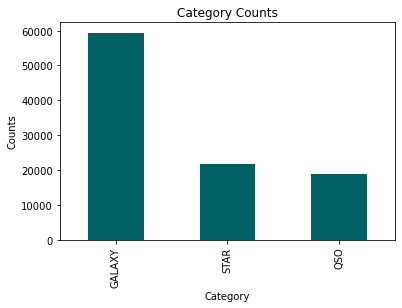

In [28]:
d_category_count = data["class"].value_counts()
d_category_count.plot(kind="bar", color="#016064")
plt.title("Category Counts")
plt.xlabel("Category")
plt.ylabel("Counts")
plt.show()
d_category_count

## Boxploty

### Boxploty dla poszczególnych atrybutów w zbiorze danych treningowych

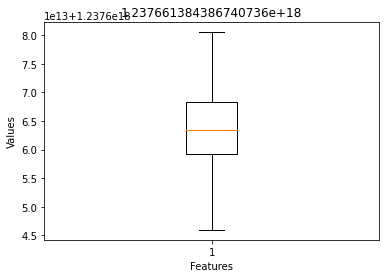

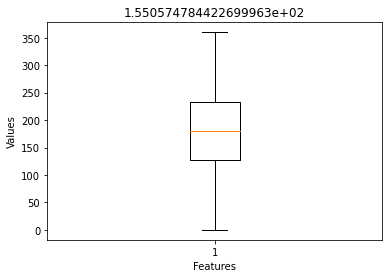

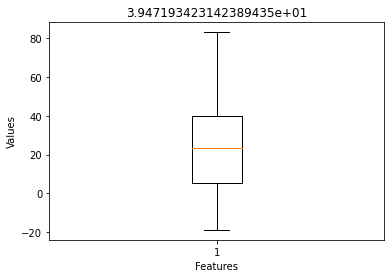

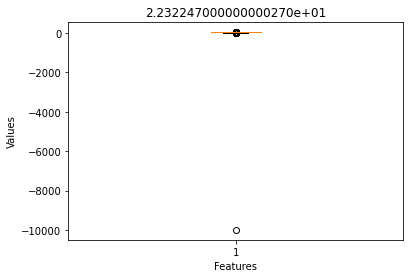

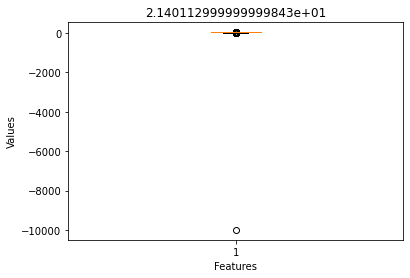

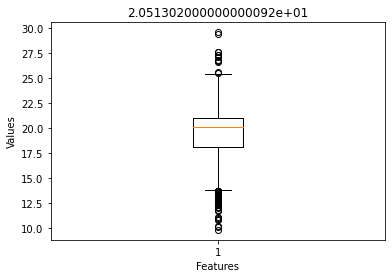

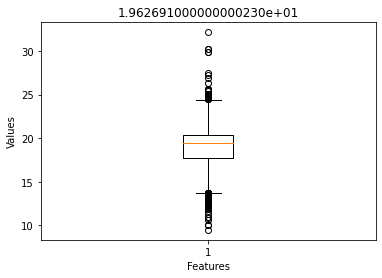

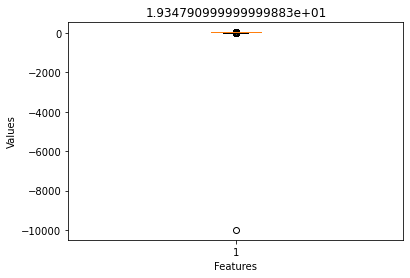

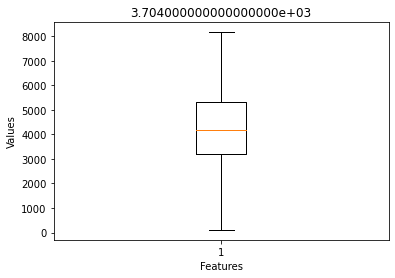

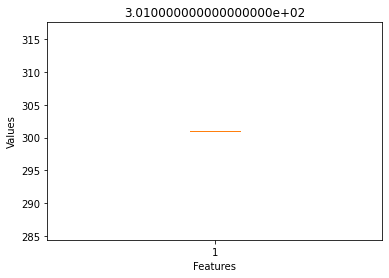

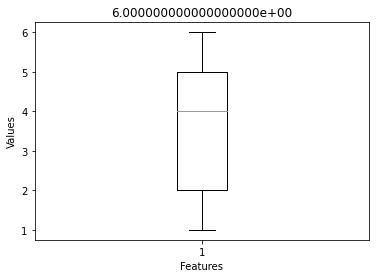

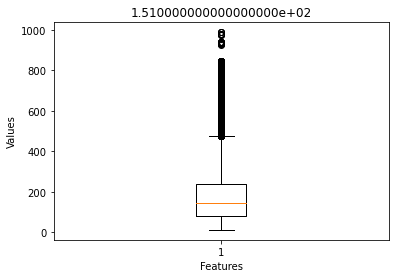

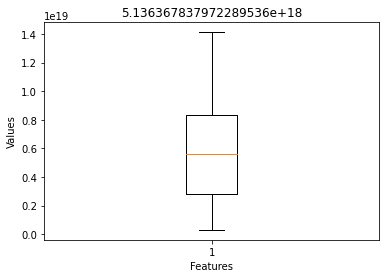

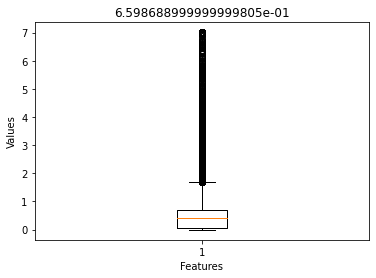

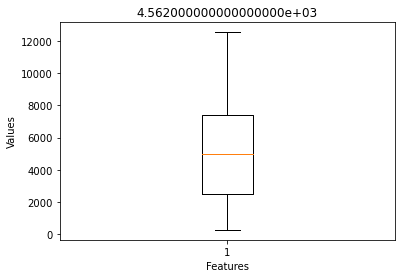

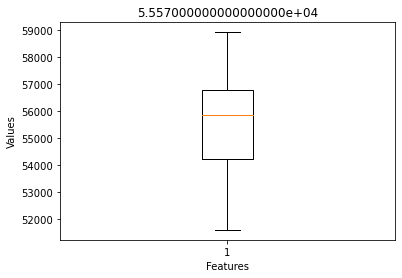

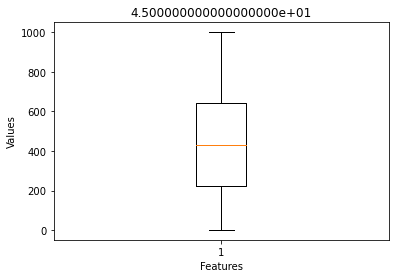

In [29]:
for column in X_train.columns:
    plt.figure()
    plt.boxplot(X_train[column])
    plt.title(column)
    plt.xlabel("Features")
    plt.ylabel("Values")

### Boxploty dla poszczególnych atrybutów w zbiorze wszystkich danych

TypeError: unsupported operand type(s) for /: 'str' and 'int'

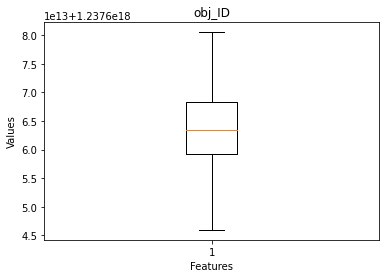

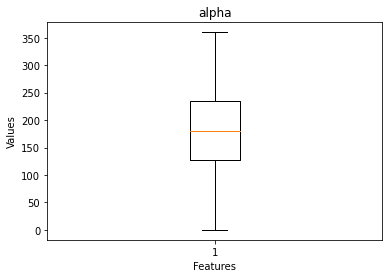

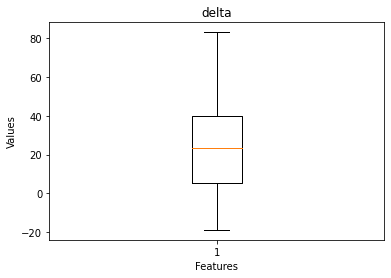

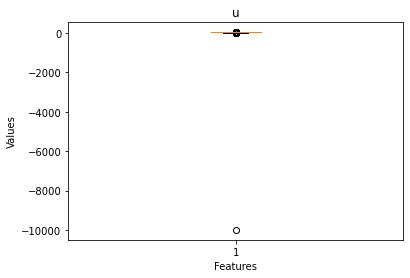

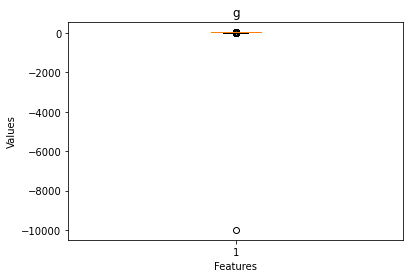

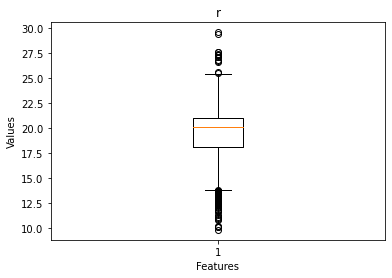

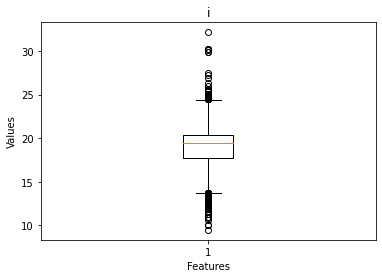

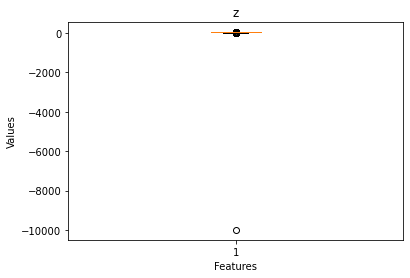

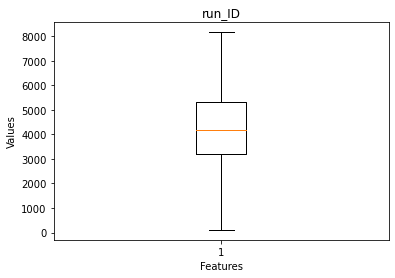

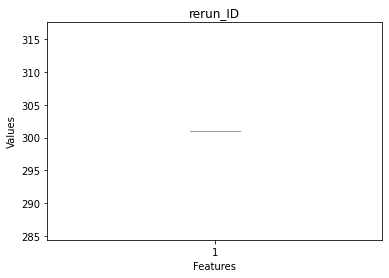

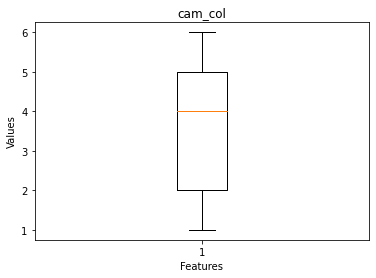

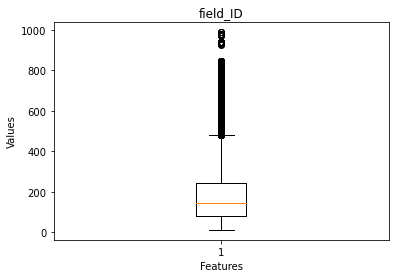

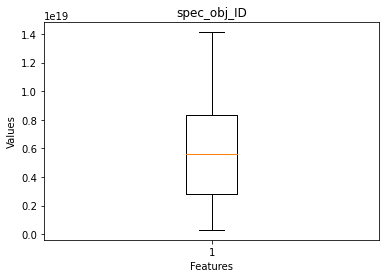

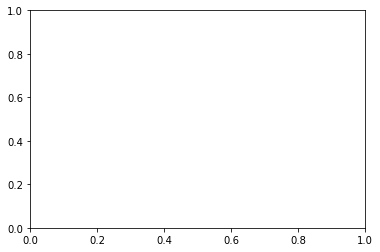

In [30]:
for column in data.columns:
    plt.figure()  # Create a new figure for each boxplot
    plt.boxplot(data[column])
    plt.title(column)  # Set the title as the column name
    plt.xlabel("Features")  # Customize the x-axis label if needed
    plt.ylabel("Values")  # Customize the y-axis label if needed